In [34]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import ravel
from numpy import transpose
import sklearn
import seaborn
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
seaborn.set(style="ticks")

In [3]:

# url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTKQyU5xY2jjMFQy24fWFs2CWrPlHKo4RedaQyoDHn1TNotqrhKPFD7z1dEaydEHe4fLPlXw-QQn38o/pub?gid=1805190093&single=true&output=csv"
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=1426322464&single=true&output=csv"
# colmns = ["name", "date", "imp_trade_value_usd", "exp_trade_value_usd", "freq_sum", "t", "log_imp_value", "log_exp_value", "log_freq"]
colmns = ["name", "date", "exp_imp_sum", "freq_sum", "t"]
data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()

In [4]:
data.head(3)

,name,date,freq_sum,t,exp_imp_sum
0,Пальмовое масло,1990,15,1,2511854778
1,Пальмовое масло,1991,5,2,3134348074
2,Пальмовое масло,1992,18,3,4157283328


In [5]:
data['freq_sum'].describe()

count      1247.000000
mean      14905.119487
std       60565.156285
min           1.000000
25%         519.500000
50%        2176.000000
75%        8062.500000
max      968096.000000
Name: freq_sum, dtype: float64

In [6]:
data.dtypes

name           object
date            int64
freq_sum        int64
t               int64
exp_imp_sum     int64
dtype: object

In [60]:
palm = data[data.loc[:,"name"] == "Пальмовое масло"]
strawberries = data[data.loc[:,"name"] == "Клубника"]
silk = data[data.loc[:,"name"] == "Шелк"]

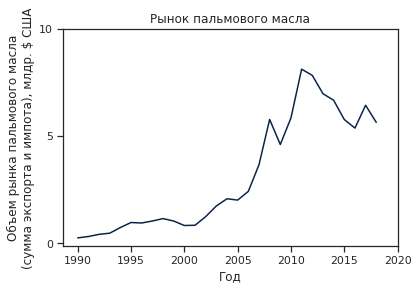

In [77]:
plt.plot(palm.date, palm.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка пальмового масла\n(сумма экспорта и импота), млдр. $ США")
plt.title("Рынок пальмового масла")
values = [0, 5*10**10, 10*10**10]
labels = [0, 5, 10]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

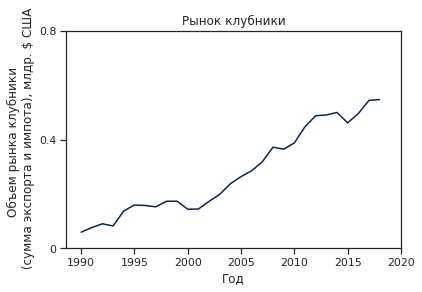

In [76]:
plt.plot(strawberries.date, strawberries.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка клубники \n (сумма экспорта и импота), млдр. $ США")
plt.title("Рынок клубники")
values = [0, 0.4*10**10, 0.8*10**10]
labels = [0, 0.4, 0.8]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

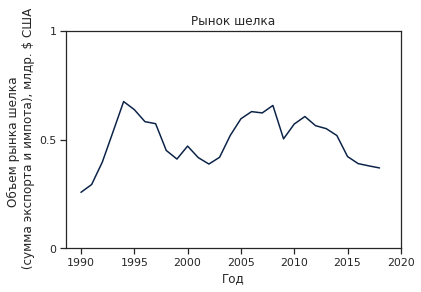

In [75]:
plt.plot(silk.date, silk.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка шелка \n (сумма экспорта и импота), млдр. $ США")
plt.title("Рынок шелка")
values = [0, 0.5*10**10, 1*10**10]
labels = [0, 0.5, 1]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

In [7]:
data.describe()

,date,freq_sum,t,exp_imp_sum
count,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,2004.000000,14905.119487,15.000000,4.947228e+10
std,8.369957,60565.156285,8.369957,2.506710e+11
min,1990.000000,1.000000,1.000000,8.968629e+07
25%,1997.000000,519.500000,8.000000,1.808279e+09
50%,2004.000000,2176.000000,15.000000,6.427610e+09
75%,2011.000000,8062.500000,22.000000,1.850857e+10
max,2018.000000,968096.000000,29.000000,3.170000e+12


In [58]:
data.corr()

,date,freq_sum,t,exp_imp_sum,sum_volume_log10,freq_sum_log10
date,1.000000,0.220260,1.000000,0.131586,0.405324,0.563090
freq_sum,0.220260,1.000000,0.220260,0.012602,0.090635,0.450107
t,1.000000,0.220260,1.000000,0.131586,0.405324,0.563090
exp_imp_sum,0.131586,0.012602,0.131586,1.000000,0.480900,0.121480
sum_volume_log10,0.405324,0.090635,0.405324,0.480900,1.000000,0.386486
freq_sum_log10,0.563090,0.450107,0.563090,0.121480,0.386486,1.000000


In [9]:
from scipy.stats.stats import pearsonr

In [10]:
list_ = []
results = []
for item_name in unique_items:

    a = data[data["name"] == item_name].exp_imp_sum
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
    results.append({"Товар":item_name, "Коэффициент Пирсона":pearsonr(a, b)[0], "Значимость":pearsonr(a, b)[1]})
    if pearsonr(a, b)[1] < 0.05:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим на уровне дов. вер-ти в 95%")
    else:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим на уровне дов. вер-ти в 95%")
print("")
print(np.array(list_).mean())

Пальмовое масло : 0.876, стат. значим на уровне дов. вер-ти в 95%
Сахар : 0.829, стат. значим на уровне дов. вер-ти в 95%
Железная руда : 0.861, стат. значим на уровне дов. вер-ти в 95%
Медь : 0.931, стат. значим на уровне дов. вер-ти в 95%
Никель : 0.813, стат. значим на уровне дов. вер-ти в 95%
Алюминий : 0.919, стат. значим на уровне дов. вер-ти в 95%
Свинец : 0.831, стат. значим на уровне дов. вер-ти в 95%
Цинк : 0.844, стат. значим на уровне дов. вер-ти в 95%
Олово : 0.775, стат. значим на уровне дов. вер-ти в 95%
Сырая нефть : 0.587, стат. значим на уровне дов. вер-ти в 95%
Серебро : 0.813, стат. значим на уровне дов. вер-ти в 95%
Платина : 0.748, стат. значим на уровне дов. вер-ти в 95%
Хлористый калий : 0.837, стат. значим на уровне дов. вер-ти в 95%
Говядина : 0.941, стат. значим на уровне дов. вер-ти в 95%
Свинина : 0.894, стат. значим на уровне дов. вер-ти в 95%
Баранина : 0.886, стат. значим на уровне дов. вер-ти в 95%
Конина : 0.204, стат. НЕ значим на уровне дов. вер-ти в

In [57]:
correlations.to_csv("corr_comtrade.csv")

In [11]:
correlations = pd.DataFrame(results)[['Товар', 'Коэффициент Пирсона', 'Значимость']]
correlations

,Товар,Коэффициент Пирсона,Значимость
0,Пальмовое масло,0.876477,4.611030e-10
1,Сахар,0.828959,2.777974e-08
2,Железная руда,0.861241,2.017851e-09
3,Медь,0.930741,2.599133e-13
4,Никель,0.813353,8.182674e-08
5,Алюминий,0.918606,2.136513e-12
6,Свинец,0.830920,2.406965e-08
7,Цинк,0.844458,8.491871e-09
8,Олово,0.775119,7.931267e-07
9,Сырая нефть,0.587100,8.138459e-04


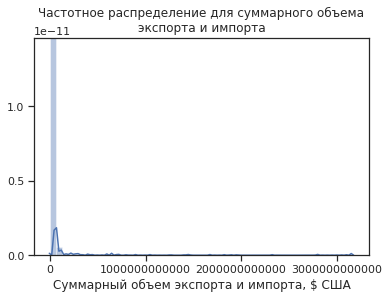

In [35]:
plt.locator_params(nbins=4)
seaborn.distplot(data.exp_imp_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для суммарного объема\nэкспорта и импорта"
plt.title(name)
plt.xlabel("Суммарный объем экспорта и импорта, $ США")
plt.ylabel("")
plt.savefig(name)
plt.show()

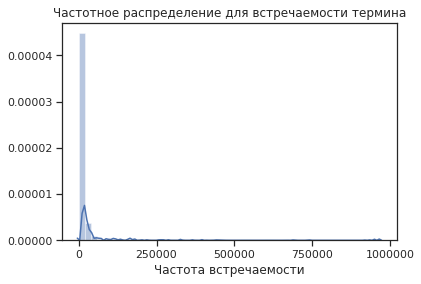

In [36]:
plt.locator_params(nbins=5)
plot = seaborn.distplot(data.freq_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для встречаемости термина"
plt.title(name)
plt.xlabel("Частота встречаемости")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [37]:
data['sum_volume_log10'] = np.log10(data['exp_imp_sum'])
data['freq_sum_log10'] = np.log10(data['freq_sum'])

Text(0.5, 1.0, 'Частотное распределение для суммарного объема\nэкспорта и импорта после логарифмирования')

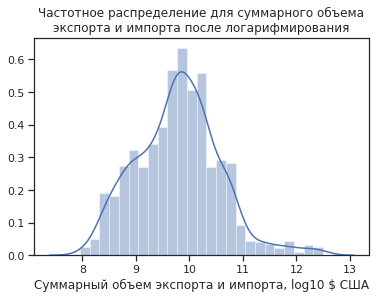

In [40]:
seaborn.distplot(data.sum_volume_log10).ticklabel_format(axis = 'x',style = "plain")
plt.xlabel("Суммарный объем экспорта и импорта, log10 $ США")
plt.ylabel("")
name = "Частотное распределение для суммарного объема\nэкспорта и импорта после логарифмирования"
plt.title(name)

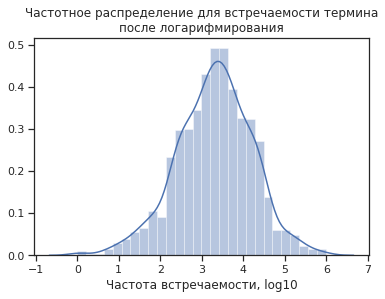

In [43]:
seaborn.distplot(data.freq_sum_log10).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для встречаемости термина\nпосле логарифмирования"
plt.title(name)
plt.xlabel("Частота встречаемости, log10")
plt.ylabel("")
plt.show()

# Linear regression

In [17]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [19]:
mod = sm.OLS(data.sum_volume_log10, data.freq_sum_log10)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.931e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:44:36   Log-Likelihood:                -2870.7
No. Observations:                1247   AIC:                             5743.
Df Residuals:                    1246   BIC:                             5749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.7788      0.020    138.

In [20]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(data[['freq_sum_log10']], data[['sum_volume_log10']])
Y_pred = linear_regressor.predict(data[['freq_sum_log10']])
linear_regressor.score(data[['freq_sum_log10']], data[['sum_volume_log10']])

0.1493712767887715

In [50]:
data.exp_imp_sum.max()

3170000000000

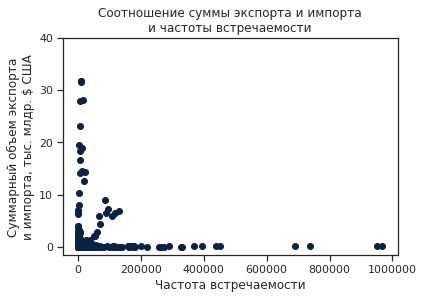

In [55]:
plt.scatter(data.freq_sum, data.exp_imp_sum, color = "#0b2247")
plt.xlabel("Частота встречаемости")
plt.ylabel("Суммарный объем экспорта\nи импорта, тыс. млдр. $ США")
plt.title("Соотношение суммы экспорта и импорта\nи частоты встречаемости")
values = [0, 1*10**12, 2*10**12, 3*10**12, 4*10**12]
labels = [0, 10, 20, 30, 40]
plt.yticks(values, labels)
plt.show()

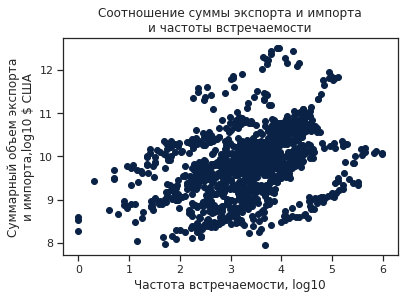

In [56]:
plt.scatter(data[['freq_sum_log10']], data[['sum_volume_log10']], color = "#0b2247")
plt.xlabel("Частота встречаемости, log10")
plt.ylabel("Суммарный объем экспорта\nи импорта,log10 $ США")
plt.title("Соотношение суммы экспорта и импорта\nи частоты встречаемости")
plt.show()

In [23]:
logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]

In [24]:
logged_data.corr()

,sum_volume_log10,freq_sum_log10,t
sum_volume_log10,1.000000,0.386486,0.405324
freq_sum_log10,0.386486,1.000000,0.563090
t,0.405324,0.563090,1.000000


In [25]:
X_log = logged_data[['freq_sum_log10']]
Y_log = logged_data['sum_volume_log10']

In [26]:
mod = sm.OLS(Y_log, X_log)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.931e+04
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:44:37   Log-Likelihood:                -2870.7
No. Observations:                1247   AIC:                             5743.
Df Residuals:                    1246   BIC:                             5749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.7788      0.020    138.

In [27]:
model__ = RandomForestRegressor(n_estimators=200, random_state=12)
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.7856485263331301

In [28]:
model__ = SVR(kernel='linear')
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.1492909828126292

In [29]:
model__ = RandomForestRegressor(n_estimators=250, random_state=12)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет 0.39
Для Сахар скор составляет 0.68
Для Железная руда скор составляет 0.111
Для Медь скор составляет 0.767
Для Никель скор составляет 0.656
Для Алюминий скор составляет 0.116
Для Свинец скор составляет 0.992
Для Цинк скор составляет 0.804
Для Олово скор составляет -3.59
Для Сырая нефть скор составляет -1.34
Для Серебро скор составляет 0.966
Для Платина скор составляет 0.578
Для Хлористый калий скор составляет 0.517
Для Говядина скор составляет 0.683
Для Свинина скор составляет 0.201
Для Баранина скор составляет 0.749
Для Конина скор составляет -3.14
Для Ячмень скор составляет 0.452
Для Маис скор составляет -0.167
Для Золото скор составляет 0.569
Для Чай скор составляет 0.606
Для Рожь скор составляет -4.15
Для Овес скор составляет -0.143
Для Рис скор составляет 0.937
Для Какао скор составляет 0.661
Для Резина скор составляет 0.759
Для Молоко скор составляет 0.853
Для Сыр скор составляет 0.727
Для Яйца скор составляет 0.485
Для Мед скор составляет -0.1

In [30]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [31]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [32]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.7059785492182193

In [33]:
RFR _ MSE = mean_squared_error(actuals_new, model_predicts_new)

SyntaxError: invalid syntax (<ipython-input-33-9099894dc4af>, line 1)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()

In [ ]:
seaborn.lineplot(a, actuals_new, color= "r").ticklabel_format(axis = 'y',style = "plain")